# FM модуляция

In [1]:
def plot(*args):
    for line in args:
        plt.figure(figsize=(15, 5))
        plt.plot(line)
        plt.show()

def plot_together(*args):
    plt.figure(figsize=(15, 5))
    for line in args:
        plt.plot(line)
    plt.show()

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import sys
import math
%matplotlib inline

In [3]:
sys.path.append('../')
from collections import OrderedDict
from moed.fm import FM
from moed.model import Model, Sequence
from moed.analysis import Analysis

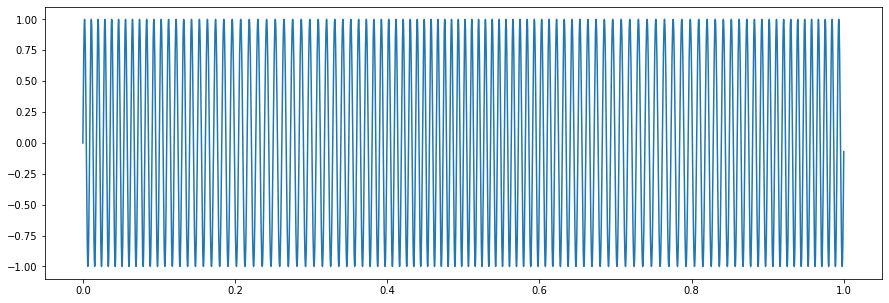

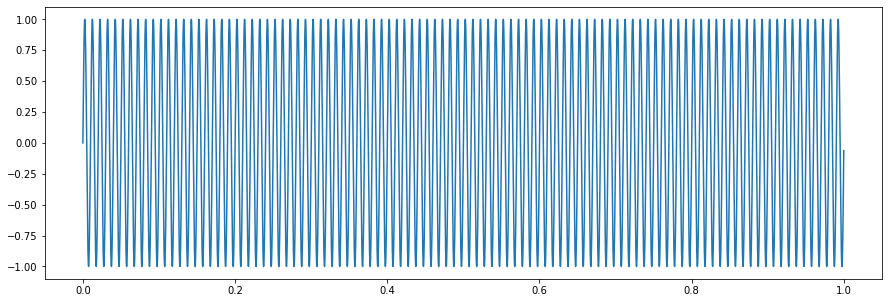

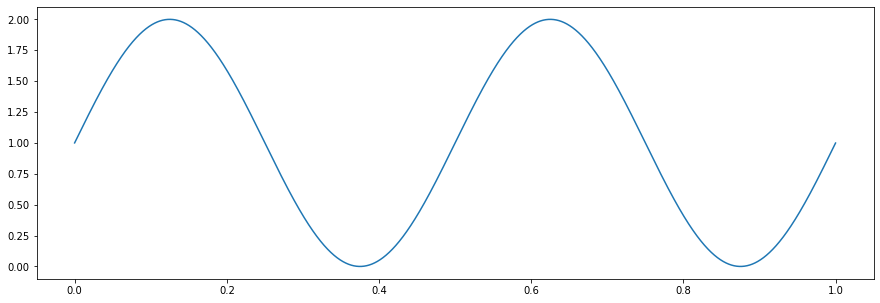

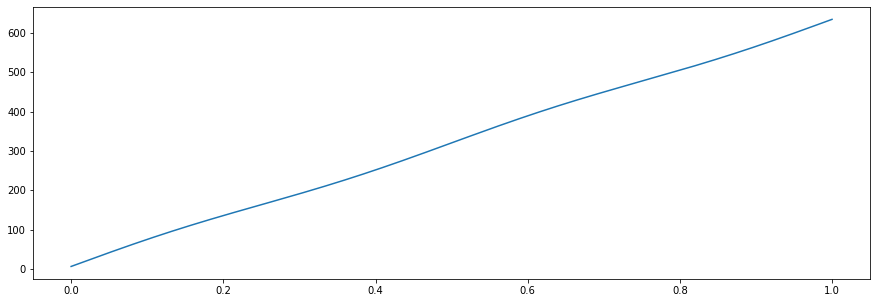

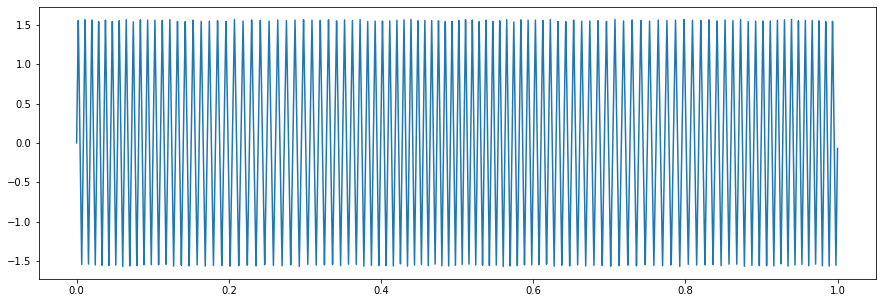

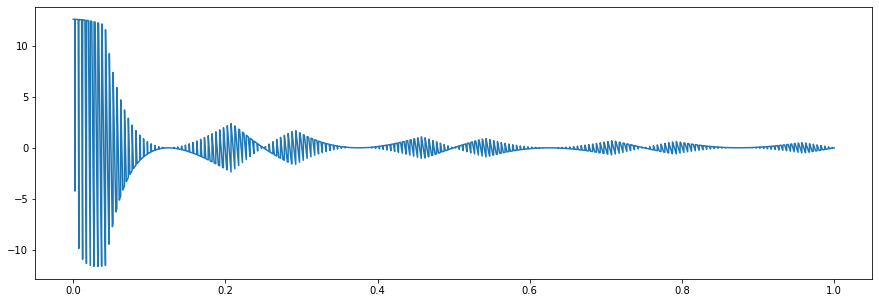

In [65]:
sampling_period = 0.0001
ts = np.arange(0, 1, sampling_period)
signal = Model.harmonic(ts, freq=2) + Sequence.from_func(ts, lambda x: 1)
fm = FM(signal, sampling_period, carrier_freq=100, mod=1)
fm.plot()

In [66]:
from moed.proc import Filter

In [72]:
hcf = Filter.high_pass_filter(512, 0.005, 90)
res = Analysis.convolution(hcf, fm)

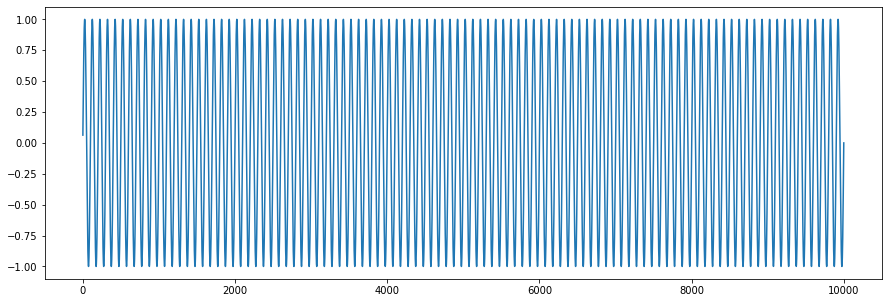

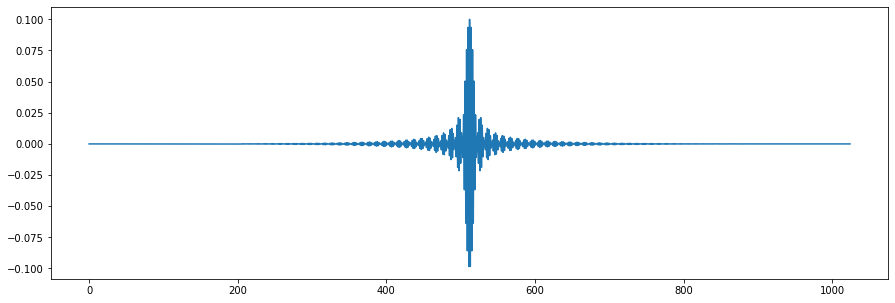

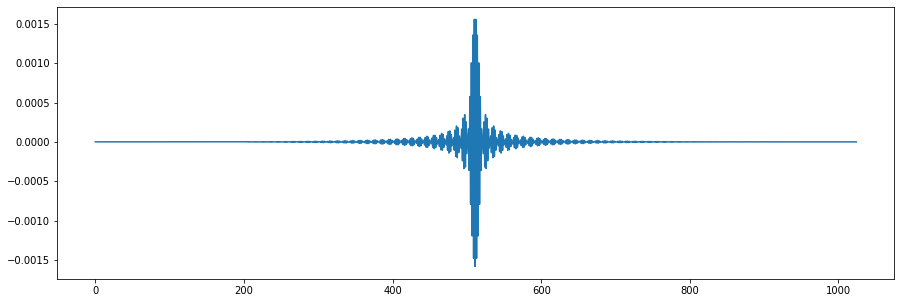

In [73]:
plot(fm.y)
plot(hcf.y)
plot(res.y)

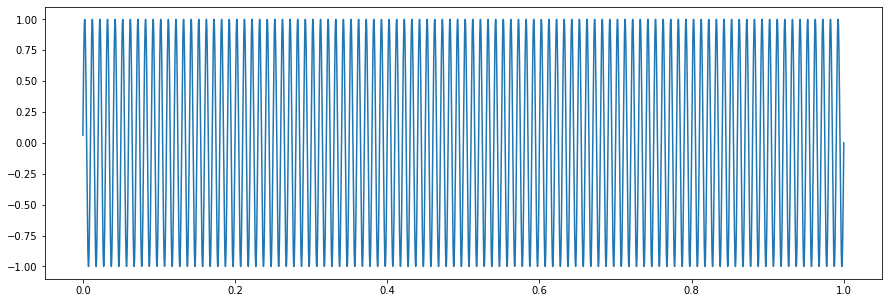

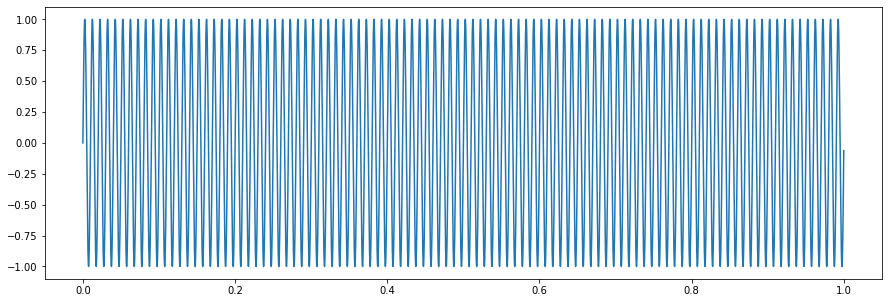

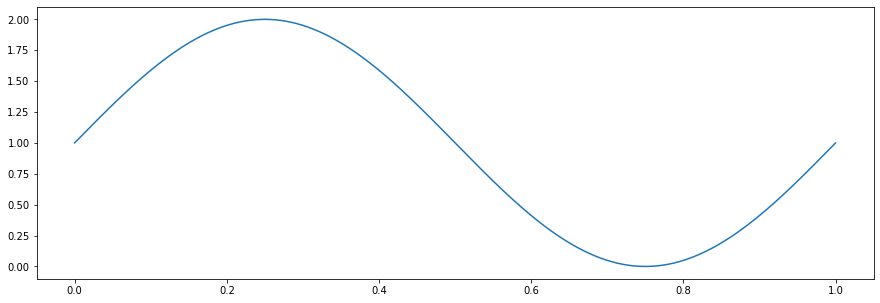

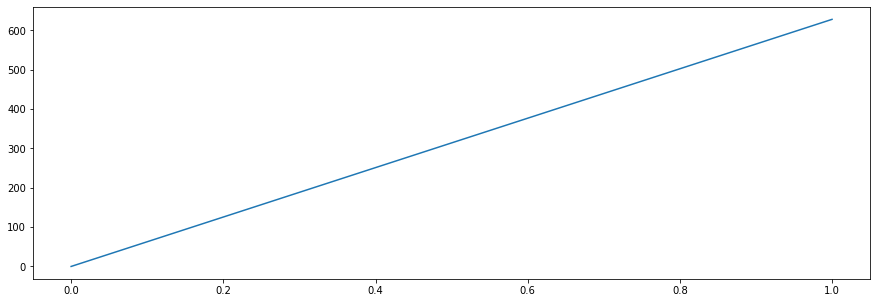

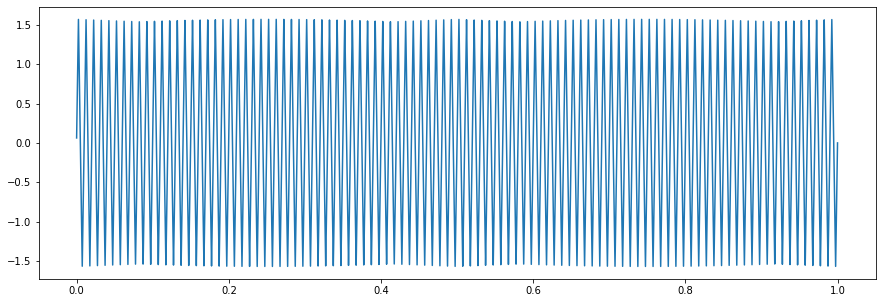

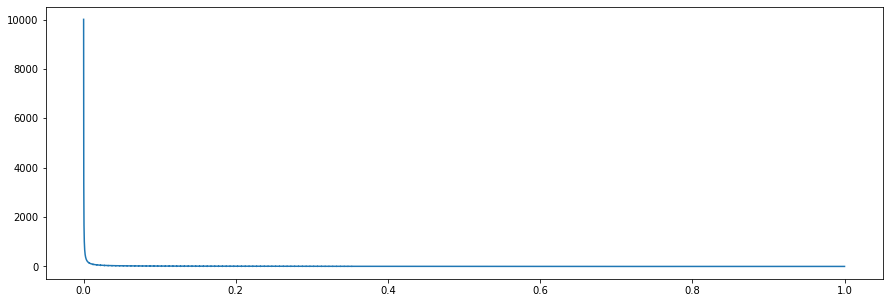

In [71]:
sampling_period = 0.0001
ts = np.arange(0, 1, sampling_period)
signal = Model.harmonic(ts, freq=1) + Sequence.from_func(ts, lambda x: 1)
fm = FM(signal, sampling_period, carrier_freq=100, mod=1/100)
fm.plot()

In [59]:
sampling_period = 0.00001
ts = np.arange(0, 1, sampling_period)
signal = Model.harmonic(ts, freq=1) + Sequence.from_func(ts, lambda x: 1)
fm = FM(signal, sampling_period, carrier_freq=1000, mod=1/100, noise_intensity=0.00001)

../moed/fm.py:73: RuntimeWarning: divide by zero encountered in double_scalars
  res = [th/(2*math.pi * self._ts[i]*self._mod) - self._carrier_freq/self._mod for i, th in enumerate(res)]


In [60]:
from sklearn.metrics import mean_squared_error
from math import sqrt

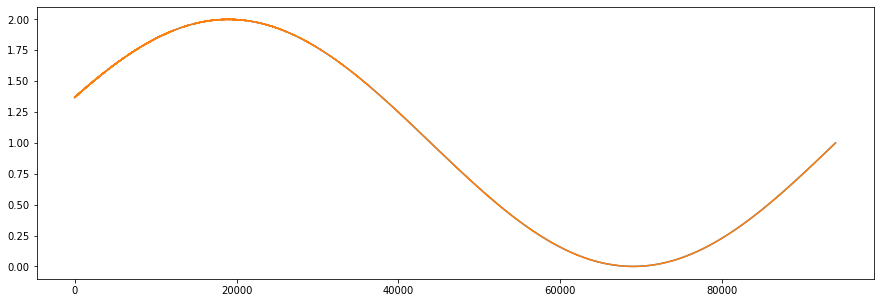

In [61]:
plot_together(fm.signal.y[6000:], fm.demodulated.y[6000:])

In [58]:
rms = sqrt(mean_squared_error(fm.signal.y[6000:], fm.demodulated.y[6000:]))
rms

1.8821059785957381

In [52]:
noisy_signal = Model.harmonic(ts, freq=1, noise_intensity=0.1) + Sequence.from_func(ts, lambda x: 1)

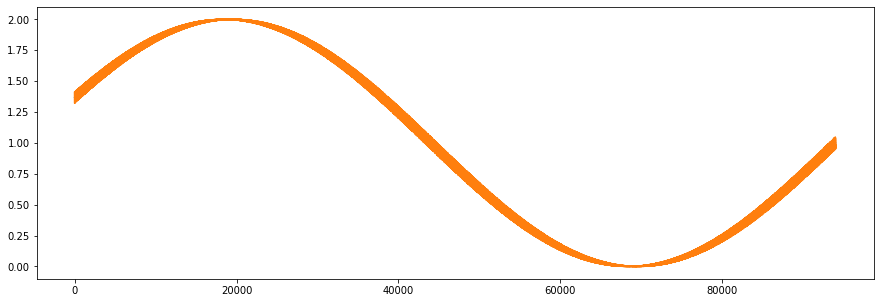

In [53]:
plot_together(signal.y[6000:], noisy_signal.y[6000:])

In [54]:
rms = sqrt(mean_squared_error(noisy_signal.y, signal.y))
rms

0.020394894930162954